# Линейная регрессия

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np

bikes = pd.read_csv('CandyData.csv')
bikes.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
bikes.filter(['sugarpercent', 'pricepercent', 'winpercent']).corr()

,sugarpercent,pricepercent,winpercent
sugarpercent,1.000000,0.329706,0.229151
pricepercent,0.329706,1.000000,0.345325
winpercent,0.229151,0.345325,1.000000


In [35]:
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
humidity_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()

bikes_weeks = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_mean], axis=1)

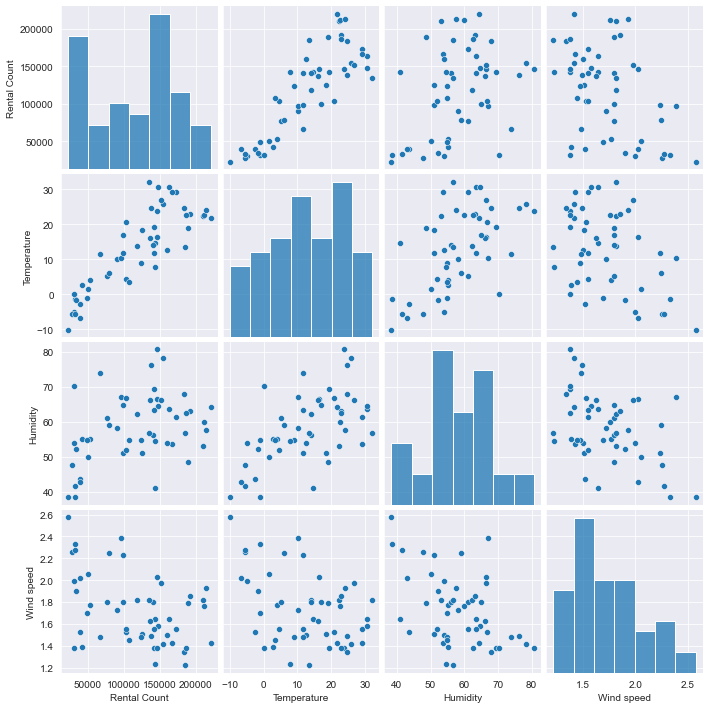

In [36]:
sns.pairplot(bikes_weeks)

In [13]:
X = bikes['sugarpercent']
y = bikes['winpercent']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=11.923863286810727, intercept=44.609441807534644, rvalue=0.22915065712800656, pvalue=0.03489789676169828, stderr=5.559607689077334, intercept_stderr=3.086085992017567)


In [9]:
r_sq = res.rvalue ** 2
print(r_sq)

0.052510023662197224


In [14]:
bikes_k = bikes.filter(['winpercent','sugarpercent', 'pricepercent'])

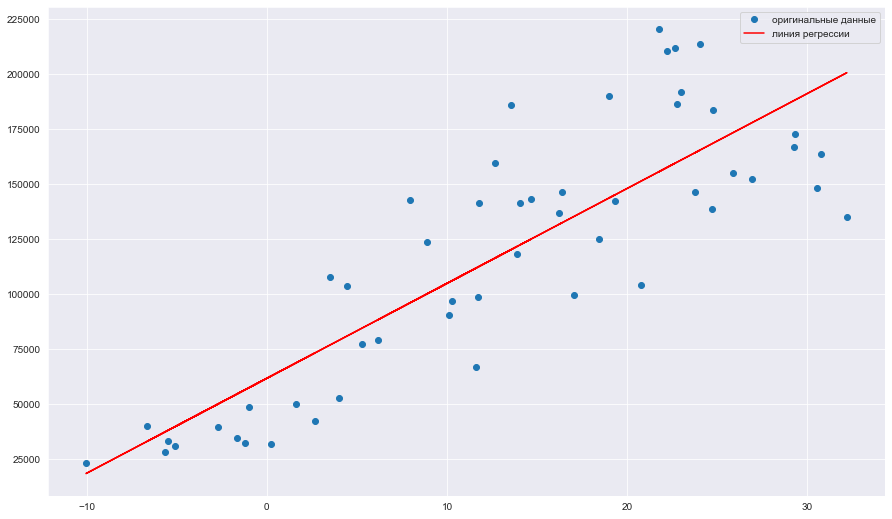

In [39]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')
plt.legend()
plt.show()

In [15]:
X_simple = bikes_k['sugarpercent']
y = bikes_k['winpercent']
X_simple_constant = sm.add_constant(X_simple)

mod = sm.OLS(y, X_simple_constant)
res_simple = mod.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.600
Date:                Wed, 02 Nov 2022   Prob (F-statistic):             0.0349
Time:                        17:56:09   Log-Likelihood:                -346.36
No. Observations:                  85   AIC:                             696.7
Df Residuals:                      83   BIC:                             701.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.6094      3.086     14.455   

In [41]:
X_mult = bikes_weeks.drop('Rental Count', axis=1)
y = bikes_weeks['winpercent']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     47.63
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           1.99e-14
Time:                        23:48:50   Log-Likelihood:                -607.91
No. Observations:                  52   AIC:                             1224.
Df Residuals:                      48   BIC:                             1232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.756e+05   4.61e+04      3.807      

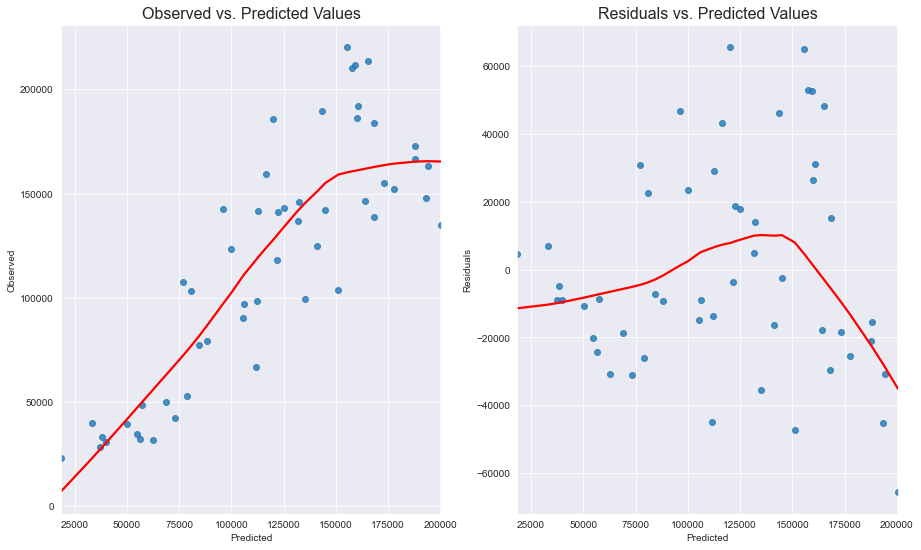

In [42]:
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(res_simple, y)    

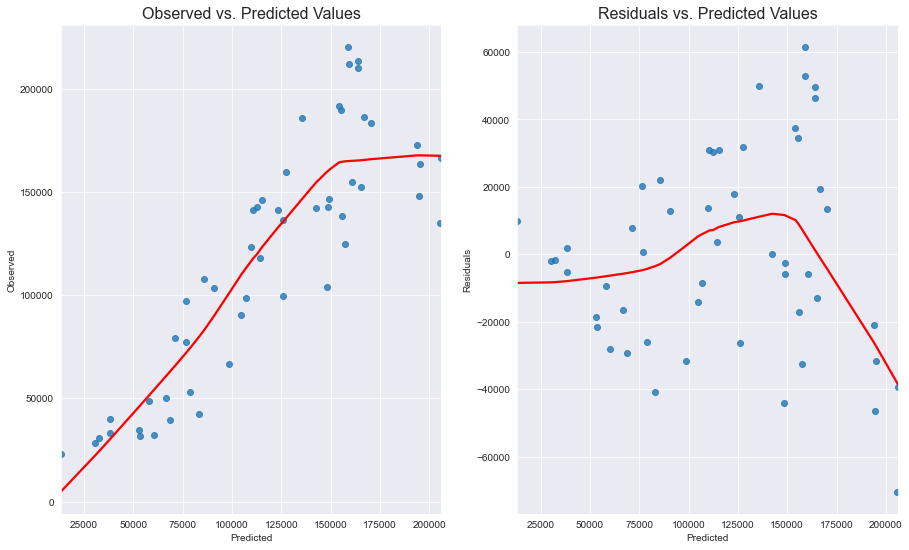

In [43]:
linearity_test(res_mult, y)    